<a href="https://colab.research.google.com/github/ziqlu0722/Machine-Learning/blob/master/HiHoCherryO_Game_ProbabilityTransitionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Game Hi Ho! Cherry-O

#### Rules:
Each player starts the game with an empty basket and 10 cherries on his/her tree. Players take turns spinning the spinner and performing the indicated action. The spinner is divided into seven sections:

- Take one cherry from tree
- Take two cherries from tree
- Take three cherries from tree
- Take four cherries from tree
- Dog: Replace cherries on tree: two if the player has at least that many in his/her basket, one if he/she has only one (no effect if player's basket is empty)
- Bird: Same as dog
- Spilled basket: Replace all cherries on tree

The first player to collect all the cherries from his/her tree and call "Hi Ho! Cherry-O" wins the game.

### 1. Hi Ho! Cherry-O Probability Density Function

**First:** Simulate the spinner: a list of 7 different moves

In [0]:
spinner = """T1 T2 T3 T4 Dog Bird Spilled""".split()
spinner

['T1', 'T2', 'T3', 'T4', 'Dog', 'Bird', 'Spilled']

**Second:** Simulate the whole game

In [0]:
import numpy as np
import random

def HHCO(times):
    
    # set the fruit in basket as 0 in the beginning
    basket = 0
    
    for _ in range(times):
        
        # get a random move, which represents the index of the list of moves
        move = random.choice(spinner)

        # take one cherry from tree
        if move == 'T1':
            basket += 1  
        
        # take two cherries from tree
        elif move == 'T2':
            basket += 2  
        
        # take three cherries from tree
        elif move == 'T3':
            basket += 3  
            
        # take four cherries from tree
        elif move == 'T4':
            basket += 4  
        
        # it will be two cases:
        # empty basket if there's 0, 1 or 2 cherries in basket
        # move two cherries from basket back to tree if there are more than 2 cherries in the basket
        elif move == 'Dog' or move == 'Bird':
            if(basket <= 2):
                basket = 0
            else:
                basket -=2
        
        # move all cherries back to tree
        elif move == 'Spilled':
            basket = 0  
        
        # if basket is full, then win and reset basket to 0
        if basket >= 10:
            basket = 0
            yield 10
        # else yield the basket
        else:
            yield basket

**Third:** simulate game for 100,000 times, and plot

In [0]:
result = list(HHCO(100000))

([<matplotlib.axis.XTick at 0x11817d128>,
 <a list of 11 Text xticklabel objects>)

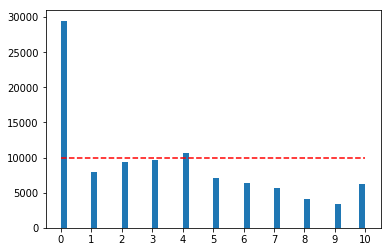

In [0]:
%matplotlib inline 
import matplotlib.pyplot as plt

avg = len(result)/10
plt.plot([0, 10], [avg, avg], 'r--');

plt.hist(result, bins=50)
plt.xticks(np.arange(11))

**Forth:** introduce probability counting framework

In [0]:
from fractions import Fraction

class ProbabilityDistribution(dict):
    "A Probability Distribution; an {outcome: probability} mapping where probabilities sum to 1."
    def __init__(self, mapping=(), **kwargs):
        self.update(mapping, **kwargs)
        total = sum(self.values())
        if isinstance(total, int): 
            total = Fraction(total, 1)
        for key in self: # Make probabilities sum to 1.
            self[key] = self[key] / total
            
    def __and__(self, pred): # Call this method by writing ProbabilityDistribution & predicate
        "New ProbabilityDistribution, for outcomes of this ProbabilityDistribution for which pred is true."
        return ProbabilityDistribution({e:self[e] for e in self if pred(e)})

In [0]:
from collections import Counter

pd_HHCO = ProbabilityDistribution(Counter(result))
pd_HHCO

{2: Fraction(9353, 100000),
 4: Fraction(10633, 100000),
 5: Fraction(141, 2000),
 3: Fraction(9707, 100000),
 0: Fraction(1843, 6250),
 6: Fraction(6387, 100000),
 8: Fraction(831, 20000),
 10: Fraction(6237, 100000),
 1: Fraction(7947, 100000),
 7: Fraction(5699, 100000),
 9: Fraction(209, 6250)}

**Fifth:** sort the dictionary by index, then plot

In [0]:
pd_HHCO_sorted = sorted(pd_HHCO.items())
pd_HHCO_sorted

[(0, Fraction(1843, 6250)),
 (1, Fraction(7947, 100000)),
 (2, Fraction(9353, 100000)),
 (3, Fraction(9707, 100000)),
 (4, Fraction(10633, 100000)),
 (5, Fraction(141, 2000)),
 (6, Fraction(6387, 100000)),
 (7, Fraction(5699, 100000)),
 (8, Fraction(831, 20000)),
 (9, Fraction(209, 6250)),
 (10, Fraction(6237, 100000))]

1/10


([<matplotlib.axis.XTick at 0x11852e160>,
 <a list of 11 Text xticklabel objects>)

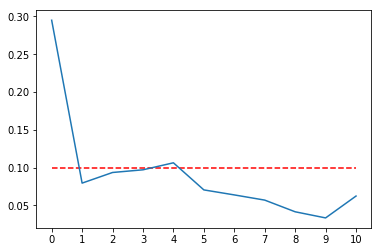

In [0]:
x, y = zip(*pd_HHCO_sorted) # unpack a list of pairs into two tuples

avg_p = sum(y)/10
plt.plot([0, 10], [avg_p, avg_p], 'r--');
print(avg_p)

plt.plot(x, y)
plt.xticks(range(11))

#### *Conclusion*

1. The average probaility of each state is around 10%
2. The most common state of the basket is to have 0 cherries. It is reasonable because there three ways might get back to 0: `Dog`, `Bird` and `Spilled`

### 2. Hi Ho! Cherry-O Object-Oriented
In the simulation part we created two classes, Game and Player. We use game to simulate the spinner results and return the spinner's action. For the player class, we use two properties Tree and Basket to simulate the take actions and replace actions. And create a matrix to take note of each turn and whole process of the simulation.

We use numpy's random to genrate random number and simulate the spinner

In [0]:
import numpy as np
#import numpy.random as random
import random

In Game class, we use a Dict effects to return card name to player, and spin function to generate random number from 1-7

In [0]:
class Game:

    def __init__(self):
        self.effects = {1: 'Cherry One', 2: 'Cherry Two', 3: 'Cherry Three',
                        4: 'Cherry Four', 5: 'Dog', 6: 'Cat', 7: 'Spilled Basket'}

    def spin(self):
        return random.choice(range(1,8))

    def effect(self):
        return self.effects[self.spin()]

In Player class, we use tree, basket and moves to indicate status in a single game. And mat to record all the status in the whole simulation. We load a Game instance as a property of player, so we can do all the things within the Player class.

In [0]:
class Player:
    
    def __init__(self):
        # We use np.zeros to generate a initialize matrix
        self.mat = np.zeros((11, 11), dtype=int)
        # We use this dict to easily handle take moves
        self.takenum = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4}
        # The game core
        self.game = Game()
        # The game status
        self.tree = 10
        self.basket = 0
        self.moves = 0

    def clear(self):
        # Before each game we need to clear the board
        self.tree = 10
        self.basket = 0
        self.moves = 0

    def take(self, num):
        # Use max min function to control the whole number in sum of 10
        self.tree = max(0, self.tree - num)
        self.basket = min(10, self.basket + num)
        # If someone has 10 cherries in hand, return True to end the game
        return self.basket == 10

    def replace(self, al=False):
        # al parameter indicates that the action is whether spilled or not
        # If al is True means that the player spilled the basket
        # If al is False means that the player spin the Dog/Bird
        if not al:
            if self.basket <= 2:
                self.basket = 0
                self.tree = 10
            else:
                self.basket -= 2
                self.tree += 2
        else:
            self.basket = 0
            self.tree = 10

    def print_stat(self, card):
        # A print function to visualize each turn in a single game
        print('-----------------------')
        print('Move:', self.moves)
        print('Draw:', card)
        print('Tree:', self.tree)
        print('Basket:', self.basket)
        print('-----------------------')

    def taketurn(self):
        # Core function to act in each turn
        # 1.Draw the card
        # 2.Judge which card
        # 3.Do the move
        # 4.Take note
        # 5.Update status
        card = self.game.effect()
        flag = False
        before = self.basket
        if card.startswith('Cherry'):
            number = card.split(' ')[1]
            flag = self.take(self.takenum[number])
        elif card == 'Dog' or card == 'Bird':
            self.replace()
        else:
            self.replace(al=True)
        after = self.basket
        self.mat[before][after] += 1
        self.moves += 1
        # self.print_stat(card)
        return flag

    def play(self):
        # Simulation of a single game
        # If taketurn returns True then break the loop
        while (True):
            if self.taketurn():
                break
            # self.mat[10][0] += 1
        self.clear()


Now we can create a Player instance and simulate for 10000 rounds

In [0]:
player = Player()
from tqdm import tqdm

for i in tqdm(range(10000)):
    player.play()
print(player.mat)

100%|██████████| 10000/10000 [00:00<00:00, 14746.13it/s]

[[33975 11247 11416 11418 11479     0     0     0     0     0     0]
 [ 5935     0  1959  1938  1946  1911     0     0     0     0     0]
 [ 6888     0     0  2394  2238  2303  2332     0     0     0     0]
 [ 4958  2442     0     0  2509  2519  2406  2416     0     0     0]
 [ 5641     0  2780     0     0  2802  2863  2761  2770     0     0]
 [ 3151     0     0  1500     0     0  1553  1461  1534  1573     0]
 [ 2947     0     0     0  1445     0     0  1394  1448  1486  1438]
 [ 2583     0     0     0     0  1237     0     0  1213  1232  2538]
 [ 1962     0     0     0     0     0  1004     0     0   983  3016]
 [ 1495     0     0     0     0     0     0   771     0     0  3008]
 [    0     0     0     0     0     0     0     0     0     0     0]]


Let's do some visualization! I found the snippets from [stackoverflow](https://stackoverflow.com/questions/14061061/how-can-i-render-3d-histograms-in-python).

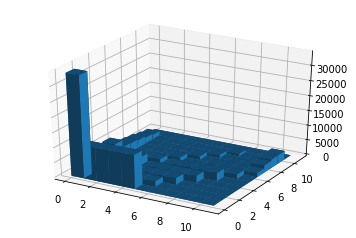

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

data_array = player.mat
# Create a figure for plotting the data as a 3D histogram.
#
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#
# Create an X-Y mesh of the same dimension as the 2D data. You can
# think of this as the floor of the plot.
#
x_data, y_data = np.meshgrid( np.arange(data_array.shape[1]),
                              np.arange(data_array.shape[0]) )
#
# Flatten out the arrays so that they may be passed to "ax.bar3d".
# Basically, ax.bar3d expects three one-dimensional arrays:
# x_data, y_data, z_data. The following call boils down to picking
# one entry from each array and plotting a bar to from
# (x_data[i], y_data[i], 0) to (x_data[i], y_data[i], z_data[i]).
#
x_data = x_data.flatten()
y_data = y_data.flatten()
z_data = data_array.flatten()
ax.bar3d( x_data,
          y_data,
          np.zeros(len(z_data)),
          1, 1, z_data )
#
# Finally, display the plot.
#
plt.show()

(11,)


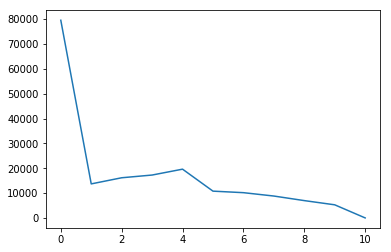

In [0]:
data_2d = np.array([np.sum(x) for x in data_array])
print(data_2d.shape)
plt.plot(data_2d)
# plt.bar(range(11), data_2d, 1, color="green")

### 3. Hi Ho! Cherry-O Dominant EigenVector

In [0]:
# define the state of basket
# column entries represents the possible #cherries in the basket (states)
# row entries represents the next state of basket
# 10 cherries per round

import numpy as np
Basket = np.zeros((11,11))
Basket

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
# Card 'Spilled basket':
from fractions import Fraction as frac

Basket[:,0]=frac(1/7)

# Card 'Cherry one-two-three-four'

for i in range(7):
    Basket[i,i+1]=frac(1,7)
    Basket[i,i+2]=frac(1,7)
    Basket[i,i+3]=frac(1,7)
    Basket[i,i+4]=frac(1,7)
    
# Basket[6,7]=frac(1/7)
# Basket[6,8]=frac(1/7)
# Basket[6,9]=frac(1/7)
# Basket[6,10]=frac(1/7)

Basket[7,8]=frac(1,7)
Basket[7,9]=frac(1,7)
Basket[7,10]=frac(2,7)

Basket[8,9]=frac(1,7)
Basket[8,10]=frac(3,7)

Basket[9,10]=frac(4,7)

Basket[10,0]=1
    
# Card 'Bird' 'Dog'

for i in range(3):
    Basket[i,0]=Basket[i,0]+frac(2,7)
for i in range(3,10):
    Basket[i,i-2]=frac(2,7)

In [0]:
print(Basket)

[[0.42857143 0.14285714 0.14285714 0.14285714 0.14285714 0.
  0.         0.         0.         0.         0.        ]
 [0.42857143 0.         0.14285714 0.14285714 0.14285714 0.14285714
  0.         0.         0.         0.         0.        ]
 [0.42857143 0.         0.         0.14285714 0.14285714 0.14285714
  0.14285714 0.         0.         0.         0.        ]
 [0.14285714 0.28571429 0.         0.         0.14285714 0.14285714
  0.14285714 0.14285714 0.         0.         0.        ]
 [0.14285714 0.         0.28571429 0.         0.         0.14285714
  0.14285714 0.14285714 0.14285714 0.         0.        ]
 [0.14285714 0.         0.         0.28571429 0.         0.
  0.14285714 0.14285714 0.14285714 0.14285714 0.        ]
 [0.14285714 0.         0.         0.         0.28571429 0.
  0.         0.14285714 0.14285714 0.14285714 0.14285714]
 [0.14285714 0.         0.         0.         0.         0.28571429
  0.         0.         0.14285714 0.14285714 0.28571429]
 [0.14285714 0. 

In [0]:
# check stochasticity
for i in range(10):
    if (np.sum(Basket[i]) != 1.):
        print(i,np.sum(Basket[i]))

1 0.9999999999999999
5 0.9999999999999998
6 0.9999999999999998
7 0.9999999999999999


In [0]:
# calculate the eigent value
from numpy import linalg as la
w, v = la.eig(Basket)
w

array([ 1.        +0.j        ,  0.34400346+0.37745803j,
        0.34400346-0.37745803j,  0.16739104+0.j        ,
       -0.17978696+0.27362352j, -0.17978696-0.27362352j,
       -0.26187723+0.17435492j, -0.26187723-0.17435492j,
       -0.26376431+0.j        , -0.10887497+0.j        ,
       -0.17085889+0.j        ])

In [0]:
# return the index where w(eigenvalue) equals 1
list(w.round(decimals=2)).index(1.00)

0

In [0]:
# return the eigenvalue according to index from last step
v[0]

array([ 0.30151134+0.j        , -0.0780902 +0.18764591j,
       -0.0780902 -0.18764591j,  0.01127906+0.j        ,
        0.05319431-0.01371154j,  0.05319431+0.01371154j,
        0.0351189 -0.11406156j,  0.0351189 +0.11406156j,
       -0.08537583+0.j        ,  0.01993354+0.j        ,
       -0.04118455+0.j        ])

In [0]:
norm = abs(v[0]).sum()

In [0]:
normalized_dominant = [(abs(v)/norm) for v in v[0]]
normalized_dominant

[0.24829352078884948,
 0.16737262374057288,
 0.16737262374057288,
 0.009288269486613019,
 0.045237175961589965,
 0.045237175961589965,
 0.09828069400078039,
 0.09828069400078039,
 0.07030669355925553,
 0.016415197916221886,
 0.033915330843173545]

([<matplotlib.axis.XTick at 0x118e28be0>,
 <a list of 11 Text xticklabel objects>)

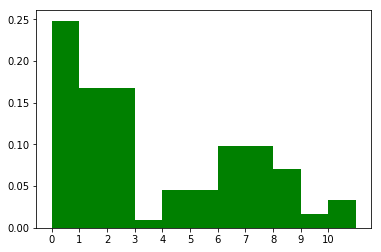

In [0]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.bar(range(11), normalized_dominant, 1, color="green", align="edge")
plt.xticks(np.arange(11))

## *Conclusion*

1. The average probaility of each state is around 10%
2. The most common state of the basket is to have 0 cherries. It is reasonable because there three ways might get back to 0: `Dog`, `Bird` and `Spilled`